In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv("Google_Stock_Price_Train.csv")
trainset = train_data.iloc[:, 1:2].values

train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
print(trainset)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


# Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler( feature_range=(0,1) )

trainset_scaled = sc.fit_transform( trainset )

print(trainset_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


# Creating a data structure with 60 timesteps and 1 output

In [5]:
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append( trainset_scaled[ i-60 : i, 0 ] )
    y_train.append( trainset_scaled[ i, 0 ] )
    
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [6]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


# Reshaping

In [7]:
x_train = np.reshape( x_train, ( x_train.shape[0], x_train.shape[1], 1  ) )

print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


# Building the RNN

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [9]:
regressor = Sequential()

In [10]:
regressor.add( LSTM( units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1) ) )

In [11]:
regressor.add( Dropout( 0.2 ) )

In [12]:
regressor.add( LSTM( units = 50, return_sequences = True ) )
regressor.add( Dropout( 0.2 ) )

In [13]:
regressor.add( LSTM( units = 50, return_sequences = True ) )
regressor.add( Dropout( 0.2 ) )

In [14]:
regressor.add( LSTM( units = 50 ) )
regressor.add( Dropout( 0.2 ) )

In [15]:
regressor.add( Dense( units = 1 ) )

# Compiling the RNN

In [16]:
regressor.compile( optimizer = 'adam', loss = 'mean_squared_error' )

# Fitting the RNN to the training set

In [17]:
regressor.fit( x_train, y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 11s 133ms/step - loss: 0.0346
Epoch 2/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0038
Epoch 13/100

38/38 [==============================] - 5s 134ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0014


## Getting the real stock prices of 2017

In [18]:
test_data = pd.read_csv("Google_Stock_Price_Test.csv")
testset = test_data.iloc[:, 1:2].values

test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [19]:
print(testset)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


## Getting the predicted stock price of 2017

In [21]:
dataset_total = pd.concat( ( train_data['Open'], test_data['Open'] ), axis = 0 )

inputs = dataset_total[len(dataset_total) - len(test_data) - 60 : ].values

inputs = inputs.reshape(-1, 1)

inputs = sc.transform( inputs )

x_test = []

for i in range(60, 80):
    x_test.append( inputs[ i-60 : i, 0 ] )
    
x_test = np.array(x_test)

x_test = np.reshape( x_test, ( x_test.shape[0], x_test.shape[1], 1  ) )

predicted = regressor.predict( x_test )

predicted = sc.inverse_transform( predicted )

print(predicted)

[[799.8992 ]
 [797.1005 ]
 [797.7786 ]
 [799.331  ]
 [802.8449 ]
 [808.9666 ]
 [814.1564 ]
 [815.80927]
 [815.9361 ]
 [815.79626]
 [815.75714]
 [815.6429 ]
 [815.54834]
 [816.20233]
 [817.21216]
 [822.3203 ]
 [829.48645]
 [836.79205]
 [840.1315 ]
 [834.8119 ]]


# Visualizing the results

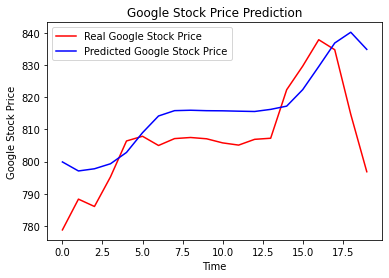

In [22]:
plt.plot( testset, color='red', label='Real Google Stock Price' )
plt.plot( predicted, color='blue', label='Predicted Google Stock Price' )
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()